In [3]:
#import pandas as pd

#dados = pd.read_csv('calibração_em_energia.csv')

#display(dados)

Energia: 0.0 keV, Eficiência: 1.0000
Energia: 50.0 keV, Eficiência: 0.7388
Energia: 100.0 keV, Eficiência: 0.5000
Energia: 150.0 keV, Eficiência: 0.3525
Energia: 200.0 keV, Eficiência: 0.2612
Energia: 250.0 keV, Eficiência: 0.2019
Energia: 300.0 keV, Eficiência: 0.1614
Energia: 350.0 keV, Eficiência: 0.1325
Energia: 400.0 keV, Eficiência: 0.1111
Energia: 450.0 keV, Eficiência: 0.0948
Energia: 500.0 keV, Eficiência: 0.0821
Energia: 550.0 keV, Eficiência: 0.0719


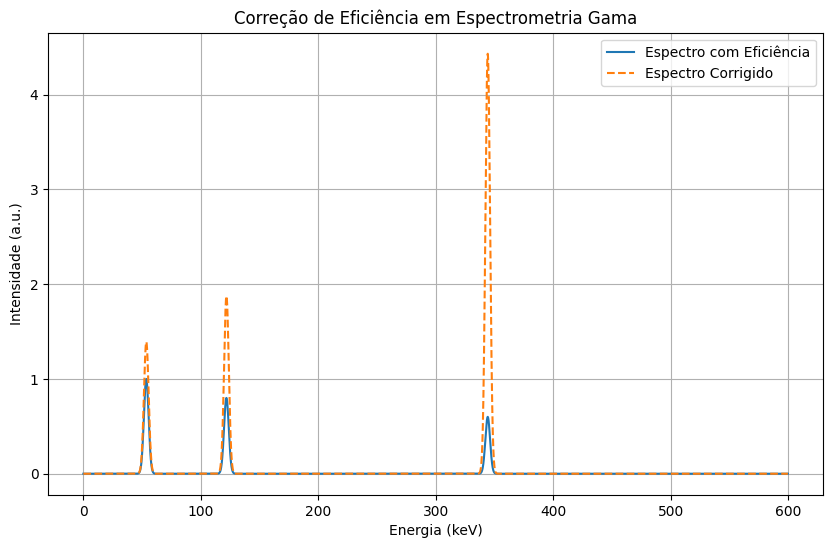

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros dos picos de emissão (energia e intensidade relativa)
picos = [
    (53.537, 1.0),  # Energia em keV, intensidade relativa
    (121.782, 0.8),
    (344.281, 0.6),
    (611.660, 0.5),
    (778.903, 0.3)
]

# Função para aproximar o delta de Dirac com uma Gaussiana
def delta_dirac_aprox(energias, energia_pico, intensidade, sigma):
    return intensidade * np.exp(-((energias - energia_pico) ** 2) / (2 * sigma ** 2))

# Função de eficiência do detector (exemplo hipotético)
def eficiencia(energia):
    return 1 / (1 + 0.001 * energia ** 1.5)  # Ajuste essa fórmula conforme necessário

# Geração do espectro
energia_min = 0
energia_max = 600
resolucao = 0.1
energias = np.arange(energia_min, energia_max, resolucao)
sigma = 2  # Largura da Gaussiana (aproximação da resolução do detector)

# Construir o espectro bruto
espectro = np.zeros_like(energias)
for energia_pico, intensidade in picos:
    espectro += delta_dirac_aprox(energias, energia_pico, intensidade, sigma)

# Calcular a eficiência para cada energia
eficiencia_vals = eficiencia(energias)

# Aplicar correção no espectro
espectro_corrigido = espectro / eficiencia_vals  # Retirar a eficiência

# Exibir os valores da eficiência (opcional: limitar o número de linhas)
for i in range(0, len(energias), int(1 / resolucao * 50)):  # Exibir a cada 50 keV
    print(f"Energia: {energias[i]:.1f} keV, Eficiência: {eficiencia_vals[i]:.4f}")

# Plotar os espectros
plt.figure(figsize=(10, 6))
plt.plot(energias, espectro, label="Espectro com Eficiência")
plt.plot(energias, espectro_corrigido, label="Espectro Corrigido", linestyle="--")
plt.title("Correção de Eficiência em Espectrometria Gama")
plt.xlabel("Energia (keV)")
plt.ylabel("Intensidade (a.u.)")
plt.legend()
plt.grid()
plt.show()
